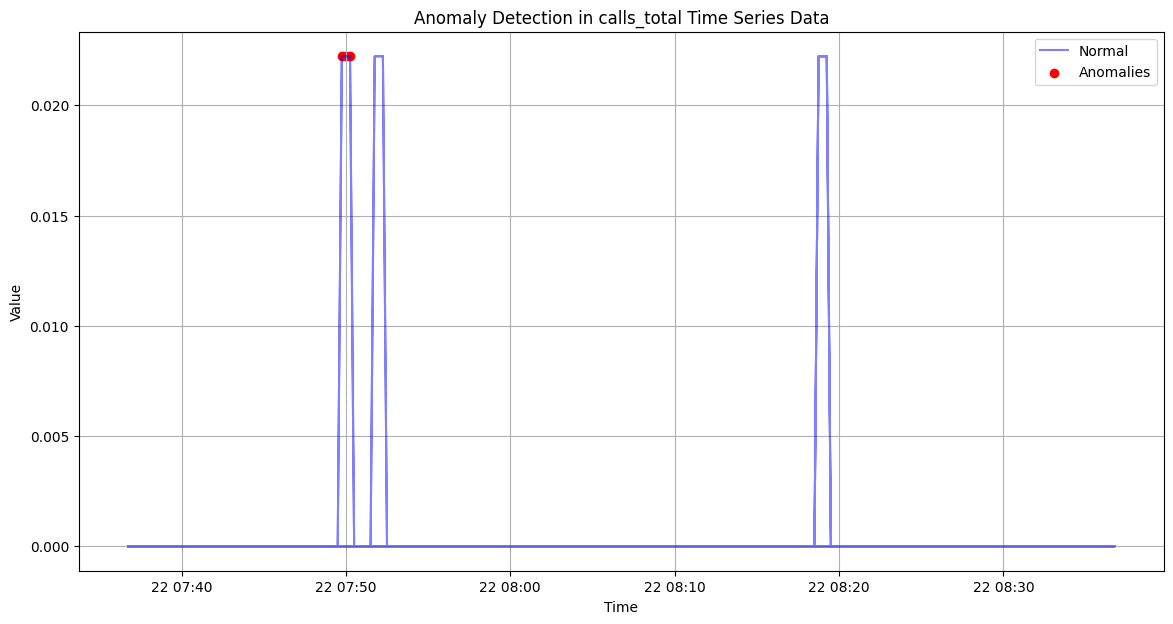

Number of anomalies detected: 3
                     Time     Value                     exported_instance  \
15958 2024-08-22 07:49:45  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
15959 2024-08-22 07:50:00  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
15960 2024-08-22 07:50:15  0.022223  4e7184d9-e546-45dc-bed1-15904d41e452   

      exported_job http_method http_route  http_status_code  \
15958  spring-boot     CONNECT          /             501.0   
15959  spring-boot     CONNECT          /             501.0   
15960  spring-boot     CONNECT          /             501.0   

                  instance                       job service_name  \
15958  otel-collector:8889  aggregated-trace-metrics  spring-boot   
15959  otel-collector:8889  aggregated-trace-metrics  spring-boot   
15960  otel-collector:8889  aggregated-trace-metrics  spring-boot   

              span_kind span_name        status_code  anomaly  
15958  SPAN_KIND_SERVER   CONNECT  STATUS_CODE_ERROR       -1  
1

In [1]:
#model with numerical and categorical anomalies (isolation_forest)
import pandas as pd
# Load the CSV file into a pandas DataFrame
file_path = 'C:/Users/abhis/Desktop/CloudBuilders/Grafana-Anomaly/Grafana-Anomaly_Detection/Anomaly_grafana/output_csv/calls_total.csv'  # Replace this with your file path 
df_calls_total= pd.read_csv(file_path)

# Display the first few rows to verify
df_calls_total.head()

#NAN VALUE TREATMENT------------------------------------------------------------------
# Display the number of NaN values in each column
df_calls_total.isna().sum()

#Interpolate
df_converted = df_calls_total.convert_dtypes()

# Select only numeric columns for interpolation
numeric_cols = df_converted.select_dtypes(include=['number']).columns

# Perform interpolation on numeric columns only
df_converted[numeric_cols] = df_converted[numeric_cols].interpolate()

# Check for any remaining NaN values
df_converted.isna().sum()

#Backward Fill
df_bfill = df_converted.bfill()
df_bfill.isna().sum()

#Forward Fill
df_ffill = df_bfill.ffill()
df_ffill.isna().sum()

#creating a final df
final_df = df_ffill
final_df.head()

# Check data types
#print(final_df.dtypes)

#summary statistics
#final_df.describe()

#DATA PROCESSING-----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest

# Selecting the numerical and categorical columns
numerical_columns = ['Value', 'http_status_code']
categorical_columns = ['exported_instance', 'exported_job', 'http_method', 
                       'http_route', 'instance', 'job', 'service_name', 
                       'span_kind', 'span_name', 'status_code']

# Preprocessing: Scaling numerical data and encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Creating the Isolation Forest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', IsolationForest(contamination=0.001, random_state=42))])

# Fit the model
model.fit(final_df)

# Predict anomalies (anomalies will be labeled as -1, normal as 1)
final_df['anomaly'] = model.fit_predict(final_df)

# Filter the anomalies
anomalies = final_df[final_df['anomaly'] == -1]

# Display the detected anomalies
anomalies

# PLOT THE ANOMALY
import matplotlib.pyplot as plt

# Convert 'Time' to datetime format
final_df['Time'] = pd.to_datetime(final_df['Time'])

# Plotting the time series data with anomalies
plt.figure(figsize=(14, 7))

# Plot all data points
plt.plot(final_df['Time'], final_df['Value'], label='Normal', color='blue', alpha=0.5)

# Highlight the anomalies
anomalies = final_df[final_df['anomaly'] == -1]
plt.scatter(anomalies['Time'], anomalies['Value'], color='red', label='Anomalies')

# Adding labels and title
plt.title('Anomaly Detection in calls_total Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())

NaN values in each column before cleaning:
Time                     0
Value                    0
exported_instance    19762
exported_job             0
http_method          13014
http_route           14460
http_status_code     10122
instance                 0
job                      0
service_name             0
span_kind                0
span_name                0
status_code              0
dtype: int64
NaN values in each column after interpolation:
NaN values in each column after backward fill:
NaN values in each column after forward fill:


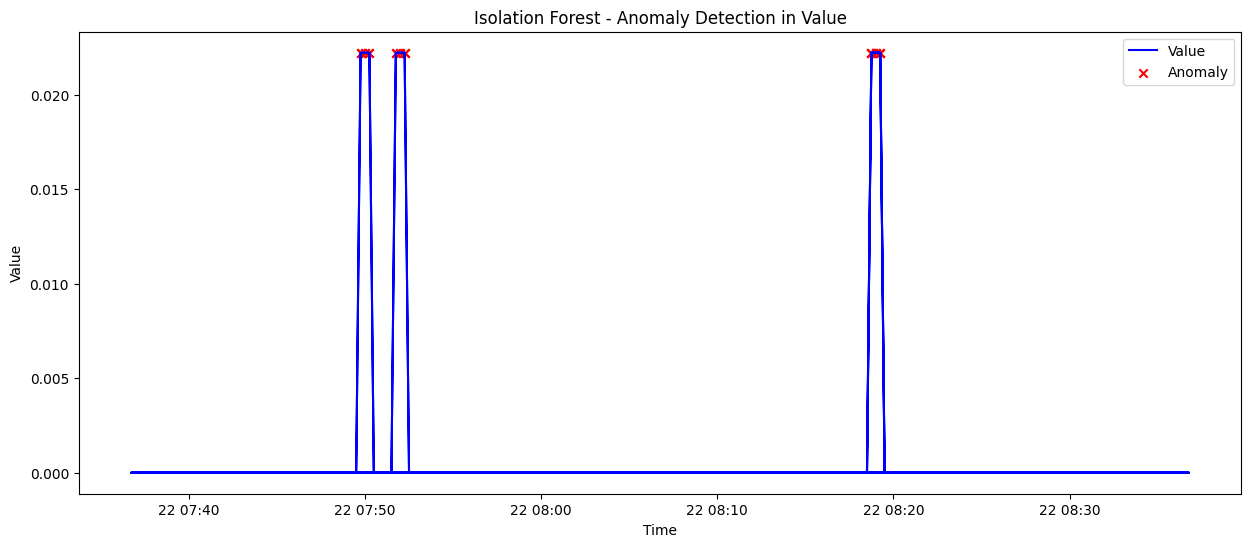

Number of anomalies detected: 21
                        Value                     exported_instance  \
Time                                                                  
2024-08-22 08:18:45  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
2024-08-22 08:19:00  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
2024-08-22 08:19:15  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
2024-08-22 08:18:45  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   
2024-08-22 08:19:00  0.022222  4e7184d9-e546-45dc-bed1-15904d41e452   

                    exported_job http_method     http_route  http_status_code  \
Time                                                                            
2024-08-22 08:18:45      fastapi         GET              /             200.0   
2024-08-22 08:19:00      fastapi         GET              /             200.0   
2024-08-22 08:19:15      fastapi         GET              /             200.0   
2024-08-22 08:18:45      fastapi         GET  /testfunction     

In [3]:
#model with only numerical anomalies (isolation_forest)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
 
# Load the dataset
df = pd.read_csv(r'C:/Users/abhis/Desktop/CloudBuilders/Grafana-Anomaly/Grafana-Anomaly_Detection/Anomaly_grafana/output_csv/calls_total.csv')
 
# Display the number of NaN values in each column
print("NaN values in each column before cleaning:")
print(df.isna().sum())
 
# Convert dtypes to appropriate types
df_converted = df.convert_dtypes()
 
# Select only numeric columns for interpolation
numeric_cols = df_converted.select_dtypes(include=['number']).columns
 
# Perform interpolation on numeric columns only
df_converted[numeric_cols] = df_converted[numeric_cols].interpolate()
 
# Check for any remaining NaN values
p#rint("NaN values in each column after interpolation:")
#print(df_converted.isna().sum())
 
# Backward Fill (to handle any remaining NaNs after interpolation)
df_bfill = df_converted.bfill()
#print("NaN values in each column after backward fill:")
#print(df_bfill.isna().sum())
 
# Forward Fill (to handle any remaining NaNs after backward fill)
df_ffill = df_bfill.ffill()
#print("NaN values in each column after forward fill:")
#print(df_ffill.isna().sum())
 
# Convert 'Time' column to datetime and set as index
df_ffill['Time'] = pd.to_datetime(df_ffill['Time'])
df_ffill.set_index('Time', inplace=True)
 
# Select all relevant numeric metric columns for anomaly detection
metrics_columns = ['Value']  # Add other metric columns as needed
metrics_data = df_ffill[metrics_columns]
 
# Standardize the data
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(metrics_data)
 
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
 
# Fit the model and predict anomalies (-1 means anomaly, 1 means normal)
df_ffill['anomaly'] = iso_forest.fit_predict(metrics_scaled)
 
# Visualize the anomalies for each metric
for column in metrics_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(df_ffill.index, df_ffill[column], label=column, color='blue')
    plt.scatter(df_ffill.index[df_ffill['anomaly'] == -1], df_ffill[column][df_ffill['anomaly'] == -1],
                color='red', label='Anomaly', marker='x')
    plt.title(f'Isolation Forest - Anomaly Detection in {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()
 
# Print out the anomalies
anomalies = df_ffill[df_ffill['anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())